In [1]:
import matplotlib.pyplot as plt
from numpy.random import *
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab

In [2]:
class RandomVar:
    
    def mean():
        pass
    def sample():
        pass

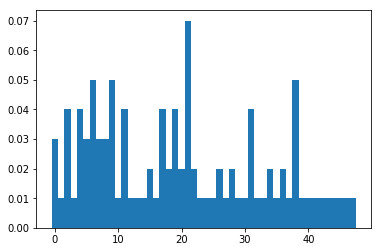

[[0, 25, 90], [1], [2, 8, 22, 96], [3], [4, 33, 67, 89], [5, 15, 18], [6, 9, 32, 74, 98], [7, 11, 35], [10, 21, 40], [12, 37, 45, 73, 79], [13], [14, 57, 60, 61], [16], [17], [19], [20, 76], [23], [24, 42, 59, 94], [26, 31], [27, 43, 54, 68], [28, 72], [29, 48, 49, 53, 88, 92, 93], [30, 97], [34], [36], [38], [39, 86], [41], [44, 56], [46], [47], [50, 55, 81, 91], [51], [52], [58, 85], [62], [63, 71], [64], [65, 66, 69, 78, 87], [70], [75], [77], [80], [82], [83], [84], [95], [99]]


In [5]:
def crp(ap=10,num=100):
    """chinese restaurant process (equivalent representation of Dirichlet)
        param: ap: alpha, its maginitude rises inversely with #tables"""
    
#     num = 100
#     ap = 10
    # first customer goes to first table
    size = [1]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        for i in range(len(size)):
            cat.append(size[i] / denom)
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw next table
        table = choice(len(cat), p=cat)
        
        # new table
        if table == len(cat) - 1:
            tables.append([n])
            size.append(1)
        # old table
        else:
            tables[table].append(n)
            size[table] += 1
           
    #support and prob
    return np.arange(num,dtype=int), [s/num for s in size]
p,tables = crp(ap=50)
plt.figure()
plt.bar(range(len(p)), p,width=1)
plt.show()
print(tables)
# print(p)
# print(len(p))

    

{0.6515246435422279: [0, 13, 21, 40, 43], -0.38459742977169276: [1, 17, 29], 2.241609752877833: [4, 12, 15, 16, 19, 74], 3.172876518007442: [2, 61, 73, 97], 4.135935949079321: [3, 9, 10, 50, 86], 5.574513222943548: [23], 6.041105712829572: [7, 33], 7.05929714757924: [26, 76], 8.892378919999933: [62], 10.354566439531846: [28, 38, 56, 67], -0.05625586174955721: [59, 79], 2.4205641063029337: [41, 69], 4.7407328136673765: [57], 0.40831238423385785: [45], 4.886733713639169: [6, 75], 5.602709946237178: [39], 3.9631472988811405: [47], 1.9986925984743937: [70], 2.7815632655424: [8, 65, 82, 90], 3.080441586415252: [46], 2.748165223903823: [52], 1.8024469210346938: [36], 3.949952589031236: [24], 4.461509883952421: [5, 98], 1.754507685117373: [35], 2.5279926342681023: [20, 66, 96], 1.7285781159513829: [31, 77, 83], -0.47639444103397377: [55, 80], -2.0466914248590875: [25, 34, 89], 4.531684440229752: [91], -0.5591660779444476: [48], -0.6954688310377346: [85], 2.3587885434636195: [32, 87], 0.789112

/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


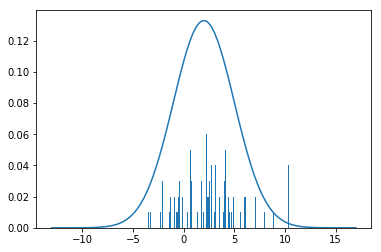

In [6]:
def DP(mu, sg, num, ap):
    """dirichlet process with Gaussian base distribution"""
    tables = dict()
    #first value drawn from G
    nval = normal(mu,sg)
    tables[nval] = [0]
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in tables.items():
            key.append(k)
            cat.append(len(v) / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(sum(cat) - 1 < 0.0001)
        
        # draw from past values or draw new value from G?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = normal(mu,sg)
            tables[nval] = [n]
            
        # past values
        else:
            tables[key[table]].append(n)
           
    return tables
    
tables = DP(2,3,100,50)

print(tables)
n = sum([len(v) for v in tables.values()])
plt.figure()
plt.bar(tables.keys(), [len(v)/n for v in tables.values()], width=0.1)
sd = math.sqrt(3)
mu = 2; sd = 3
x = np.linspace(mu - 5*sd, mu + 5*sd, 100)
plt.plot(x,mlab.normpdf(x, mu, sd))
plt.show()

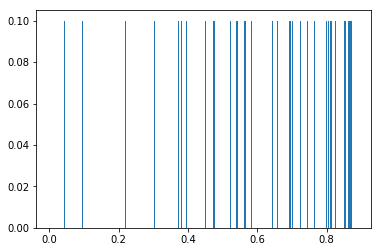

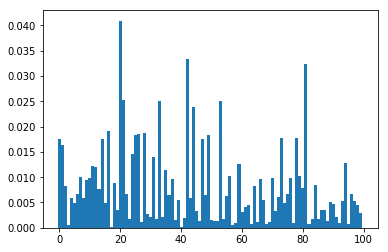

In [7]:
# stick breaking
def GEM(ap,K):
    """Griffiths-Engen-McCloskey"""
    
    #sample from Beta(1,ap)
    bt = beta(1,ap,K)
    #first sample is v_0
    sample = [bt[0]]
    pd = (1-bt[0])
    for i in range(1,K):
        sample.append(bt[i]*pd)
        pd *= (1-bt[i])
    return sample
def stickBreaking(ap,K=1000):
    """table in N just like Chinese Restaurant"""
    support = np.arange(K)
    p = GEM(ap,K)
    return p, support
plt.figure()
sample = GEM(50, 100)
plt.bar(np.cumsum(sample),0.1,width=0.001)

plt.figure()
sample,_ = stickBreaking(50,100)
plt.bar(np.arange(100), sample,width=1)

plt.show()

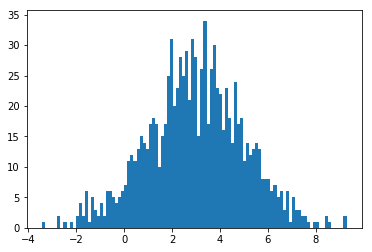

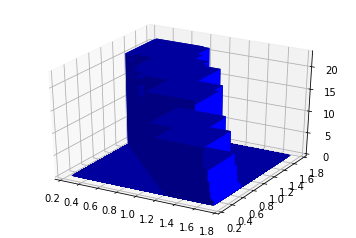

In [8]:
smpl = normal(3,2,1000)
plt.figure()
plt.hist(smpl, bins=100)

s = dirichlet([1,2],1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(s[:,0], s[:,1], bins=100)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

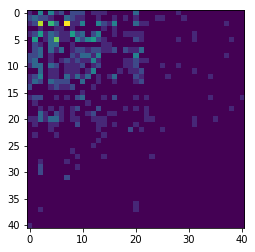

In [69]:
def DirichletNet(ap,N):
    """Dirchlet Network Distribution, N is size of adj matrix"""
    p,_ = crp(ap=ap,num=1000)
    sz = len(p)
    sr = choice(sz,size=(N,2),replace=True,p=p)
    adj = np.zeros((sz,sz), dtype=int)
    for s,r in sr:
        adj[s,r] += 1
    return adj

adj = DirichletNet(10,500)
plt.figure()
plt.imshow(adj)
plt.show()

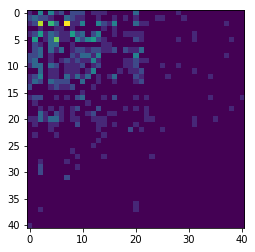

In [71]:
def DPCat(p, ap=10, num=1000):
    """Dirichlet process with base Categorical distribution p"""
    
    # (truncated) support according to p
    sz = len(p)
    
    size = dict()
    #first value drawn from p
    nval = choice(sz,p=p)
    size[nval] = 1
    
    for n in range(1,num):
        # compute categorical distribution for customer assignment
        cat = []
        denom = n+ap #n+1-1+ap
        
        key = []
        for k,v in size.items():
            key.append(k)
            cat.append(v / denom)
            
        # new table probability
        cat.append(ap / denom)
        assert(abs(sum(cat) - 1) < 0.0001)
        
        # draw from past values or draw new value from P?
        table = choice(len(cat), p=cat)
        
        # new value from G
        if table == len(cat) - 1:
            nval = choice(sz,p=p)
            if nval in size:
                size[nval] += 1
            else:
                size[nval] = 1
            
        # past values
        else:
            size[key[table]] += 1
           
    # convert dict to support and prob
    return np.array(list(size.keys())), np.array([s/num for s in size.values()])

def AsDirichletNet(gamma, tau, N=500):
    """Asymmetric Dirichlet Network Distribution"""
    P,_ = crp(ap=gamma, num=1000)
    As, Ap = DPCat(P, tau, num=1000)
    s = As[choice(len(As), size=N, p=Ap)]
    Bs, Bp = DPCat(P, tau, num=1000)
    r = Bs[choice(len(Bs), size=N, p=Bp)]
    
    adj = np.zeros((N,N), dtype=int)
    for ss,rr in zip(s,r):
        adj[ss, rr] +=1  
        
    return adj 
AsDirichletNet(50,10,500)
plt.imshow(adj)
plt.show()

In [ ]:
# mu ~ Normal(mu_0, simga_0)
# x ~ Normal(mu, sigma)

import matplotlib.mlab as mlab
def gaussian_mean_prior(X, sg, mu_0, sg_0):
    N = len(X)
    mu_h = sg*mu_0/(N*sg_0+sg) + sg_0*np.sum(X)/(N*sg_0+sg)
    sg_h = 1 / (N/sg+1/sg_0)
    return mu_h, sg_h

X = normal(5,1,100)
mu_h,sg_h = gaussian_mean_prior(X,1,1,1)

plt.figure()
plt.hist(X,bins=100,density=True)
print(mu_h, sg_h)
plt.scatter(mu_h,0,c='red')
sigma = math.sqrt(sg_h)
x = np.linspace(mu_h - 3*sigma, mu_h + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu_h, sigma))
plt.show()

In [56]:
a = [1,2,3]
a[1,2]


TypeError: list indices must be integers or slices, not tuple